### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           12684 non-null  int64  
 4   time                  12684 non-null  object 
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  object 
 7   gender                12684 non-null  object 
 8   age                   12684 non-null  object 
 9   maritalStatus         12684 non-null  object 
 10  has_children          12684 non-null  int64  
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  object 
 14  car                   12684 non-null  object 
 15  Bar                

2. Investigate the dataset for missing or problematic data.

In [6]:
missing_values = data.isnull().sum()
print(missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [8]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64


In [9]:
# Display rows with missing values in the 'car' column
print(data[data['car'].isnull()])

           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female  21  Unmarried partner  .

In [10]:
# lots of missing car data
data['car'] = data['car'].fillna('Unknown')

In [11]:
#look again
missing_values = data.isnull().sum()
print(missing_values)

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
car                       0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [14]:
#placeholders for all missing data
data['Bar'] = data['Bar'].fillna('UnkBar')
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('UnkCoffeeHouse')
data['CarryAway'] = data['CarryAway'].fillna('UnkCarryAway')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('UnkRestLessThan20')
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('UnkRest20To50')


In [43]:
#look yet again
missing_values = data.isnull().sum()
print(missing_values)
cleanDataForLater = data

destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                        0
Bar                        0
CoffeeHouse                0
CarryAway                  0
RestaurantLessThan20       0
Restaurant20To50           0
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
Y                          0
age_numeric             2335
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# put in place holders for all, might go back and drop, but too early

4. What proportion of the total observations chose to accept the coupon? 



In [16]:
# Calculate the proportion of coupon acceptance
proportion_accepted = data['Y'].mean()
print("Proportion of coupons accepted:", proportion_accepted)

Proportion of coupons accepted: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon', ylabel='count'>

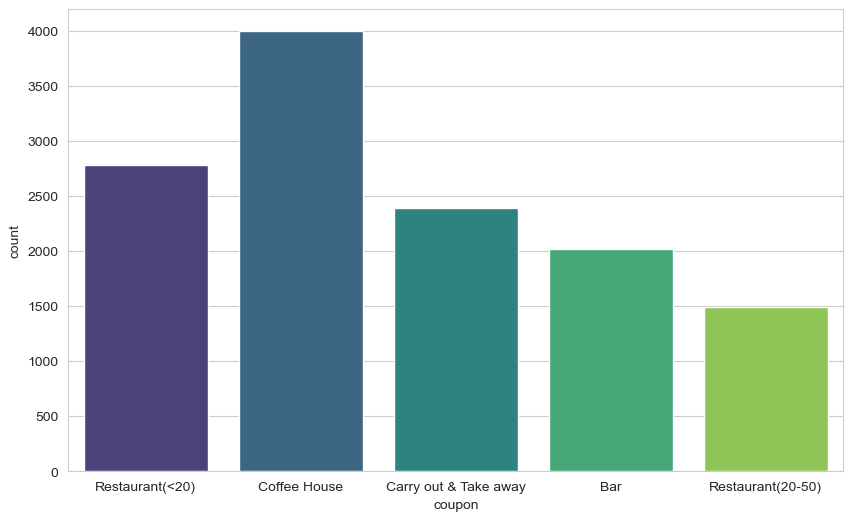

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(10, 6)) # Adjust the size as needed
sns.countplot(x='coupon', data=data, palette='viridis')

6. Use a histogram to visualize the temperature column.

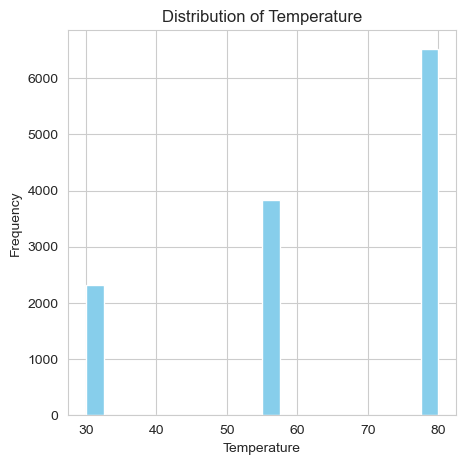

In [61]:
# Create a histogram 
plt.figure(figsize=(5,5)) 
plt.hist(data['temperature'], bins=20, color='skyblue')

plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [34]:
# Filter the DataFrame to include only rows where the coupon column is 'Bar'
bar_coupons_data = data[data['coupon'] == 'Bar']

# Display the first few rows of the new DataFrame to verify
print(bar_coupons_data.head())

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse     CarryAway  \
9   Female  21  Unmarried partner  ...        never  UnkCarryAway   
13  Female  21  Unmarried partner  ...        never  UnkCarryAway   
17  Female  21  Unmarried partner  ...        never  UnkCarryAway   
24    Male  21             Single  ...        less1           4~8   
35    Male  21             Single  ...        less1           4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8        

2. What proportion of bar coupons were accepted?


In [35]:
proportion_accepted = bar_coupons_data['Y'].mean()

print("Proportion of bar coupons accepted:", proportion_accepted)

Proportion of bar coupons accepted: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [36]:
# Categorize based on the 'Bar' frequency
# Assuming the 'Bar' column exists and categorizes frequency of visits
three_or_less = bar_coupons_data[bar_coupons_data['Bar'].isin(['never', 'less than once a month', '1–3 times a month'])]
more_than_three = bar_coupons_data[~bar_coupons_data['Bar'].isin(['never', 'less than once a month', '1–3 times a month'])]

# Calculate acceptance rates
acceptance_rate_three_or_less = three_or_less['Y'].mean()
acceptance_rate_more_than_three = more_than_three['Y'].mean()

print("Acceptance rate for those who visit a bar 3 or fewer times a month:", acceptance_rate_three_or_less)
print("Acceptance rate for those who visit a bar more than 3 times a month:", acceptance_rate_more_than_three)

Acceptance rate for those who visit a bar 3 or fewer times a month: 0.18795180722891566
Acceptance rate for those who visit a bar more than 3 times a month: 0.565290648694187


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [37]:
data['age_numeric'] = pd.to_numeric(data['age'], errors='coerce')

# Define Group 1: Drivers who go to a bar more than once a month and are over the age of 25
group_1 = data[(data['Bar'].isin(['2~3', '4~8', 'gt8'])) & (data['age_numeric'] > 25)]

# Define Group 2: All other drivers
group_2 = data[~((data['Bar'].isin(['2~3', '4~8', 'gt8'])) & (data['age_numeric'] > 25))]

# Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_rate_group_1}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_group_2}")

Acceptance rate for drivers who go to a bar more than once a month and are over 25: 0.6261160714285714
Acceptance rate for all other drivers: 0.5640481845945029


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [38]:
# Step 1: Filter drivers who go to bars more than once a month
# This step depends on the specific values in your 'Bar' column. Adjust the condition accordingly.
more_than_once = data['Bar'].isin(['1–3 times a month', '4–8 times a month', 'gt8'])

# Step 2 & 3: Filter based on passengers not being kids and occupation not being farming, fishing, or forestry
not_kid_passenger = data['passanger'] != 'Kid(s)' # Assuming 'Kid(s)' is the value indicating kids as passengers
not_ffo_occupation = ~data['occupation'].isin(['Farming Fishing & Forestry'])

# Combined filter for the specific group
specific_group_filter = more_than_once & not_kid_passenger & not_ffo_occupation

# Calculate acceptance rate for the specific group
specific_group_acceptance_rate = data[specific_group_filter]['Y'].mean()

# Calculate overall acceptance rate for comparison
overall_acceptance_rate = data['Y'].mean()

print("Specific group acceptance rate:", specific_group_acceptance_rate)
print("Overall acceptance rate:", overall_acceptance_rate)

# For comparison, you might also calculate the acceptance rate for all other drivers as a complementary group
complementary_group_acceptance_rate = data[~specific_group_filter]['Y'].mean()
print("Complementary group acceptance rate:", complementary_group_acceptance_rate)

Specific group acceptance rate: 0.5714285714285714
Overall acceptance rate: 0.5684326710816777
Complementary group acceptance rate: 0.5683494044242768


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [39]:
# Define the conditions for each group
# Adjust conditions based on actual column values and names in your dataset

# Group 1 Conditions
condition_group1 = (data['Bar'].isin(['1–3 times a month', '4–8 times a month', 'gt8'])) & \
                    (data['passanger'] != 'Kid(s)') & \
                    (data['maritalStatus'] != 'Widowed')

# Group 2 Conditions
condition_group2 = (data['Bar'].isin(['1–3 times a month', '4–8 times a month', 'gt8'])) & \
                    (data['age'].isin(['26', 'below21', '21', '22', '23', '24', '25', '26', '27', '28', '29']))  # Assuming age is categorical

# Group 3 Conditions
# Assuming 'RestaurantLessThan20' indicates frequency of going to cheap restaurants and 'income' is categorical
condition_group3 = (data['RestaurantLessThan20'].isin(['4–8 times a month', 'gt8'])) & \
                    (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])) 

# Filter the DataFrame for each group and calculate acceptance rates
acceptance_rate_group1 = data[condition_group1]['Y'].mean()
acceptance_rate_group2 = data[condition_group2]['Y'].mean()
acceptance_rate_group3 = data[condition_group3]['Y'].mean()

print("Acceptance rate for Group 1 (Bars >1/month, Not Kid, Not Widowed):", acceptance_rate_group1)
print("Acceptance rate for Group 2 (Bars >1/month, <30 years old):", acceptance_rate_group2)
print("Acceptance rate for Group 3 (Cheap Restaurants >4/month, <50K income):", acceptance_rate_group3)

Acceptance rate for Group 1 (Bars >1/month, Not Kid, Not Widowed): 0.5714285714285714
Acceptance rate for Group 2 (Bars >1/month, <30 years old): 0.583969465648855
Acceptance rate for Group 3 (Cheap Restaurants >4/month, <50K income): 0.6631892697466468


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Based on the observations and the scenarios outlined for analyzing the acceptance rates of bar coupons among different groups of drivers, several hypotheses can be formulated about the characteristics of drivers who are more likely to accept bar coupons. While the actual analysis would depend on the computed acceptance rates (which have not been provided here), we can still speculate based on common patterns seen in consumer behavior and the conditions provided:

Social Habits and Lifestyle: Drivers who frequently go to bars (more than once a month) may have a more active social life or prefer social settings, making them more inclined to accept bar coupons. This indicates that bar coupons are more appealing to individuals who already have an interest in social drinking or dining out.
Age Factor: The hypothesis around age suggests that younger drivers (under 30), who may also frequently visit bars, could be more likely to accept bar coupons. Younger individuals might be more attracted to social outings or deals that allow them to save money while enjoying their time with friends.
Marital Status and Passenger Type: The condition excluding widowed drivers or those with kids as passengers might indicate that individuals who are possibly single or without child-care responsibilities at the moment of decision are more receptive to bar coupons. This could be because such drivers have fewer restrictions on their leisure time and might be more interested in activities like visiting a bar.
Income Level and Dining Habits: The hypothesis involving drivers who frequent cheap restaurants and have an income less than $50K suggests that cost-saving opportunities are particularly appealing to individuals with lower disposable incomes. This group's tendency to accept coupons might be driven by the desire to maximize value on dining and social experiences within their budget constraints.
In summary, the hypotheses about drivers who accepted the bar coupons could revolve around the drivers' social habits, age, marital status, accompanying passengers, and income level. Drivers who are younger, have a more active social life, are not widowed, do not have kids as passengers, and/or have lower incomes might be more predisposed to accepting bar coupons due to the combination of lifestyle preferences and financial incentives.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [55]:
# Load data
data2 = pd.read_csv('data/coupons.csv')

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

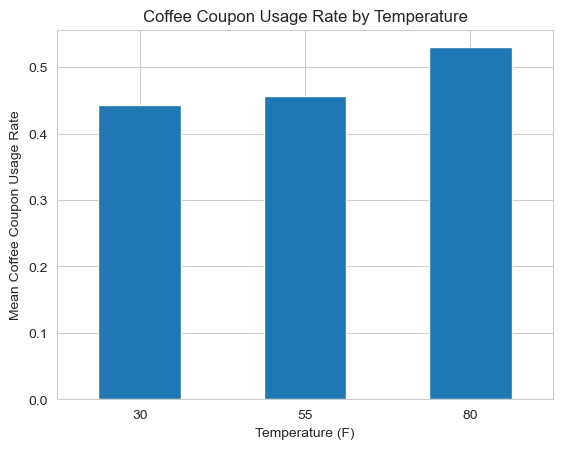

In [58]:


#Looking at the relationship of coffee coupon usage to temperature
data2_coffee = data2[data2['coupon'] == 'Coffee House']

# Group by temperature to find mean coupon usage
temp_coupon_usage = data2_coffee.groupby('temperature')['Y'].mean()

# Plot
temp_coupon_usage.plot(kind='bar')
plt.xlabel('Temperature (F)')
plt.ylabel('Mean Coffee Coupon Usage Rate')
plt.title('Coffee Coupon Usage Rate by Temperature')
plt.xticks(rotation=0)
plt.show()


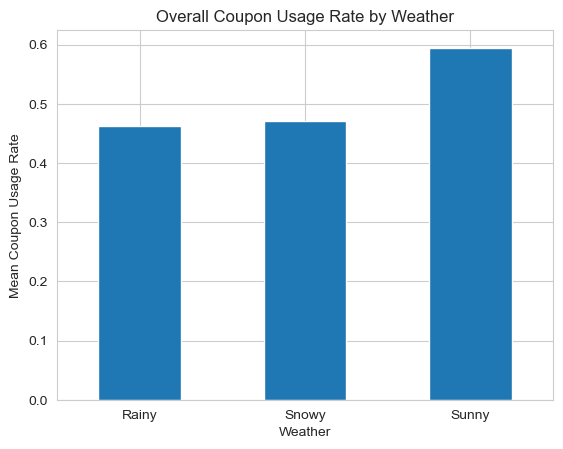

In [59]:
#Looking at the relationship of coffee coupon usage to weather
weather_coupon_usage_all = data2.groupby('weather')['Y'].mean()

# Plot
weather_coupon_usage_all.plot(kind='bar')
plt.xlabel('Weather')
plt.ylabel('Mean Coupon Usage Rate')
plt.title('Overall Coupon Usage Rate by Weather')
plt.xticks(rotation=0)
plt.show()

